# <center> Gold Price Prediction</h2>
# <Left> Author : Pooja Shinde </h2>

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Task 1: Initial Data Exploration

In [4]:
data = pd.read_csv("C:\\Users\\hp\\Downloads\\gold_price.csv")

In [5]:
data.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [7]:
data.shape

(4718, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4718 non-null   object 
 1   USD (AM)   4718 non-null   float64
 2   USD (PM)   4682 non-null   float64
 3   GBP (AM)   4718 non-null   float64
 4   GBP (PM)   4682 non-null   float64
 5   EURO (AM)  4718 non-null   float64
 6   EURO (PM)  4682 non-null   float64
dtypes: float64(6), object(1)
memory usage: 258.1+ KB


In [9]:
data.describe()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
count,4718.000000,4682.000000,4718.000000,4682.000000,4718.000000,4682.000000
mean,959.990812,959.728684,625.068432,624.921846,773.892791,773.843716
std,449.456217,449.487106,324.491391,324.544149,351.555806,351.696708
min,256.700000,255.950000,176.572000,176.441000,276.711000,277.667000
25%,449.112500,448.612500,244.576750,244.463500,361.393500,361.338750
50%,1113.125000,1112.275000,717.145000,716.210500,874.354500,875.141500
75%,1293.750000,1294.225000,939.065500,939.266500,1085.967750,1085.816250
max,1896.500000,1895.000000,1265.900000,1265.010000,1389.890000,1392.030000


In [10]:
data.isnull()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4713,False,False,False,False,False,False,False
4714,False,False,False,False,False,False,False
4715,False,False,False,False,False,False,False
4716,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

Date          0
USD (AM)      0
USD (PM)     36
GBP (AM)      0
GBP (PM)     36
EURO (AM)     0
EURO (PM)    36
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.isnull().sum()

Date         0
USD (AM)     0
USD (PM)     0
GBP (AM)     0
GBP (PM)     0
EURO (AM)    0
EURO (PM)    0
dtype: int64

In [15]:
data.duplicated().sum()

0

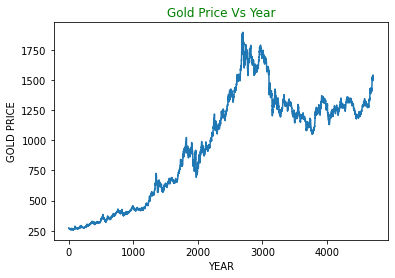

In [18]:
plt.title('Gold Price Vs Year',color='Green')
data['USD (AM)'].plot()
plt.xlabel('YEAR')
plt.ylabel('GOLD PRICE')
plt.show()

## Task 2: Create Train & Test Sets

In [19]:
data['MA_5'] = data['USD (AM)'].rolling(window = 5).mean()
data['MA_10'] = data['USD (AM)'].rolling(window = 10).mean()
data=data.dropna()

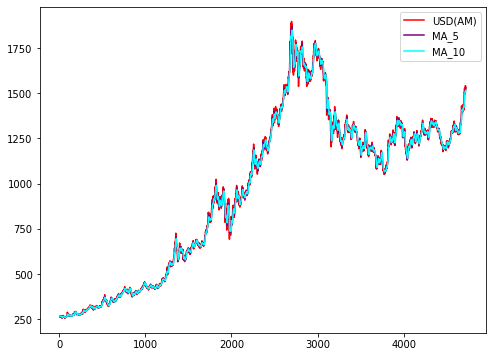

In [26]:

plt.figure(figsize=(8,6))
plt.plot(data['USD (AM)'],label= 'Given_price', color='Red')
plt.plot(data['MA_5'],label= 'Moving average 5 Days', color='Purple')
plt.plot(data['MA_10'],label= 'Moving average 10 Days', color='cyan')

plt.legend(['USD(AM)','MA_5','MA_10'])
plt.show()
            


In [27]:
#train and test spliting

x=data[['MA_5','MA_10']]
y=data['USD (AM)']

t=0.8
t=int(t*len(data))
x_train,x_test,y_train,y_test = x[:t].round(4),x[t:].round(4), y[:t].round(4),y[t:].round(4)

## Task 3: Develop Models & Predictions

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [33]:
regressor = RandomForestRegressor(n_estimators=100)

In [34]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [35]:
test_data_prediction = regressor.predict(x_test)

In [36]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.9758377959921185


In [37]:
y_test = list(y_test)

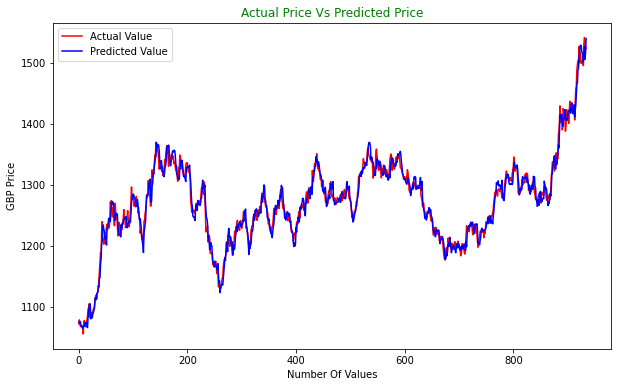

In [52]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label= 'Actual Value',color='red')

plt.plot(test_data_prediction,label= 'Predicted Value', color='blue')
plt.title('Actual Price Vs Predicted Price',color='Green')
plt.xlabel('Number Of Values')
plt.ylabel('GBP Price')

plt.legend()
plt.show()